# SVM

Certainly! Let's dive into the details of **Support Vector Machines (SVM)** in machine learning.

**Support Vector Machine (SVM)** is a powerful algorithm used for both classification and regression tasks. It's particularly effective for classification problems. Here's how it works:

1. **Objective**:
   - The main goal of SVM is to find an optimal hyperplane in an N-dimensional space that can separate data points into different classes.
   - The hyperplane aims to maximize the margin (distance) between the closest points of different classes.

2. **Linear Separation**:
   - Consider a scenario where we have two independent variables, denoted as `x1` and `x2`, and a dependent variable that can be either a blue circle or a red circle.
   - Multiple lines (hyperplanes) can segregate the data points into red and blue circles.
   - The best hyperplane is the one that maximizes the separation or margin between the two classes.

3. **Maximum-Margin Hyperplane (Hard Margin)**:
   - The hyperplane that maximizes the distance from it to the nearest data point on each side is known as the maximum-margin hyperplane.
   - SVM aims to find this hyperplane.
   - Even if there are outliers (like the blue ball near the boundary of red balls), SVM is robust and still finds the best hyperplane.

4. **Nonlinear Separation**:
   - SVM can handle nonlinear relationships by using kernel functions.
   - Kernel functions transform the original feature space into a higher-dimensional space where linear separation becomes possible.
   - Common kernel functions include polynomial kernels and radial basis function (RBF) kernels.

5. **Soft Margin SVM (Handling Outliers)**:
   - In real-world data, perfect linear separation may not be possible due to noise or outliers.
   - Soft Margin SVM allows for some misclassification by introducing a penalty for points that cross the margin.
   - It balances maximizing the margin with minimizing misclassification.

6. **Applications**:
   - SVMs are used for various tasks:
     - Text classification
     - Image classification
     - Spam detection
     - Handwriting identification
     - Gene expression analysis
     - Face detection
     - Anomaly detection

In summary, SVM finds the best hyperplane to separate data points into different classes, whether linearly or nonlinearly. Its robustness to outliers and ability to handle high-dimensional data make it a popular choice in machine learning¹²³. If you have any more questions, feel free to ask! 😊

Source: Conversation with Bing, 5/5/2024
(1) Support Vector Machine (SVM) Algorithm - GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/.
(2) SVM Machine Learning Tutorial – What is the Support Vector Machine .... https://www.freecodecamp.org/news/svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples/.
(3) Support Vector Machines (SVM) Algorithm Explained - MonkeyLearn. https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/.
(4) Support Vector Machine Explained - Towards Data Science. https://towardsdatascience.com/support-vector-machine-explained-8bfef2f17e71.

Support Vector Machine is a supervised Machine Learning algorithm widely used for solving different machine learning problems. Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.

## Understanding the Mathematics involved
Let’s take the example of the following dataset and see how can we divide the data into appropriate groups.
<img src='SVM_intution.PNG'  width="300">

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown 
<img src='SVM_hyperplane.PNG' width="400">


The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM. 
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. 
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.
<img src= "SVM_3D_Hyperplane.PNG" width="300">
                                                                        Image: bogotobogo.com 


In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that’s what a kernel function does without computing the additional coordinates for the higher dimension.


## Python Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As the data consists of values which differ a lot in magnitude, they need to be brought to the same scale. It's done using the standard scalar.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
new_data=scaler.fit_transform(df.drop(labels=['quality'],axis=1))

In [7]:
new_data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [10]:
new_df=pd.DataFrame(data=new_data,columns=columns)

In [11]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


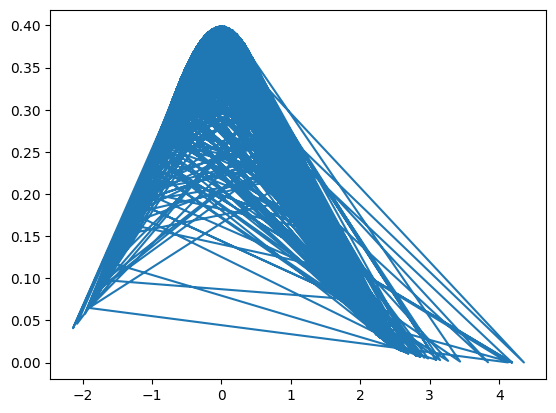

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  

  
# Calculating mean and standard deviation
mean = statistics.mean(new_df["fixed acidity"])
sd = statistics.stdev(new_df["fixed acidity"])
  
plt.plot(new_df["fixed acidity"], norm.pdf(new_df["fixed acidity"], mean, sd))
plt.show()

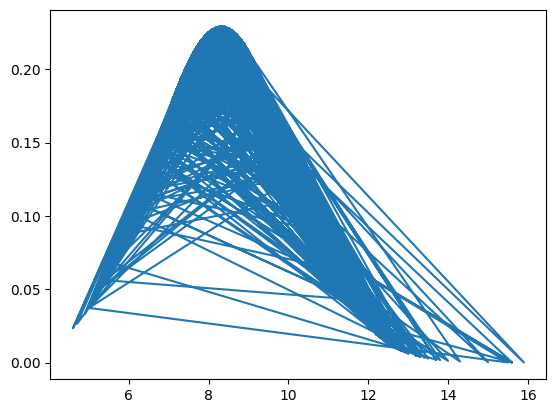

In [13]:
# Calculating mean and standard deviation
mean = statistics.mean(df["fixed acidity"])
sd = statistics.stdev(df["fixed acidity"])
  
plt.plot(df["fixed acidity"], norm.pdf(df["fixed acidity"], mean, sd))
plt.show()

C:\Users\suman\.conda\envs\practice\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\suman\.conda\envs\practice\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\suman\.conda\envs\practice\lib\site-packages\ipykernel_

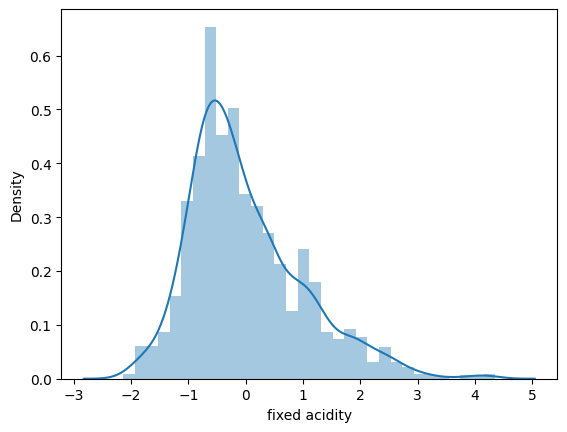

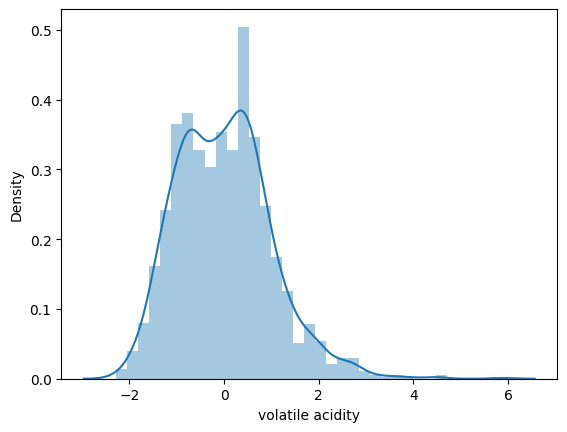

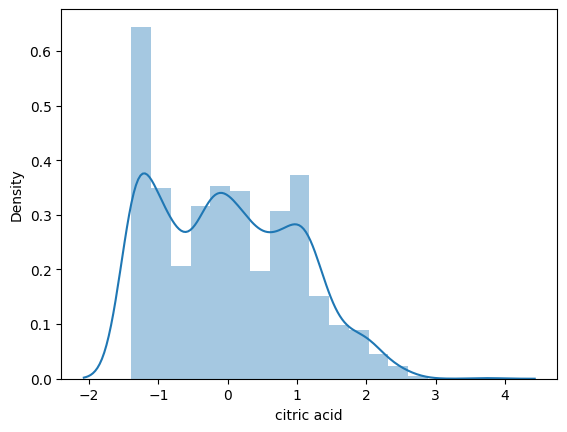

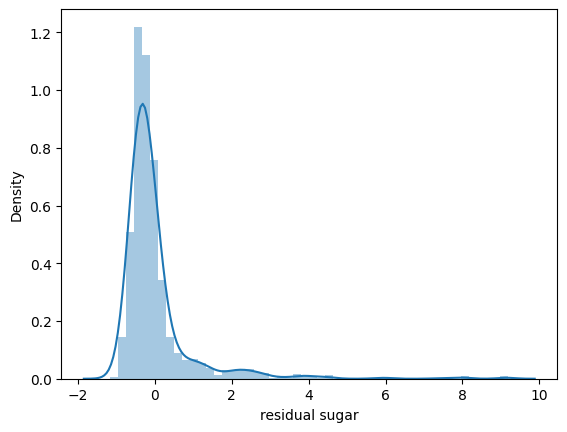

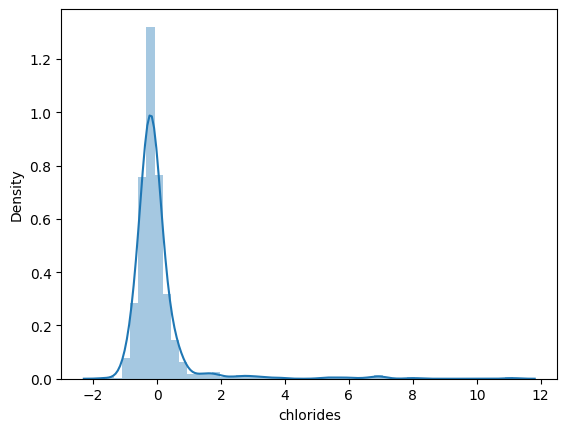

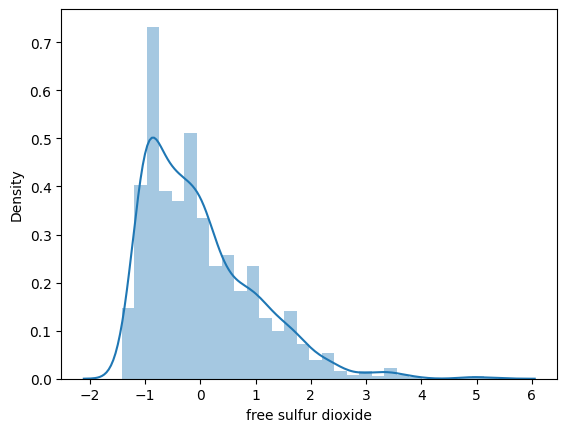

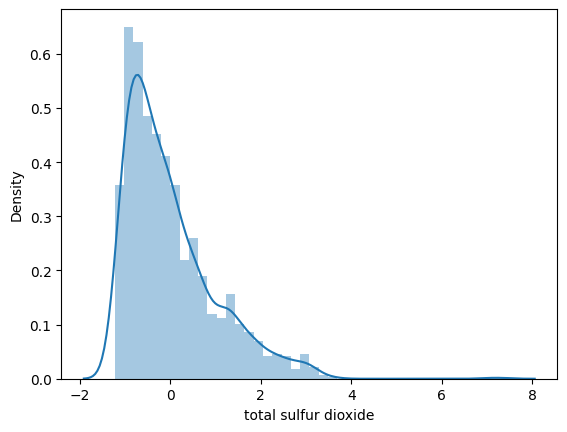

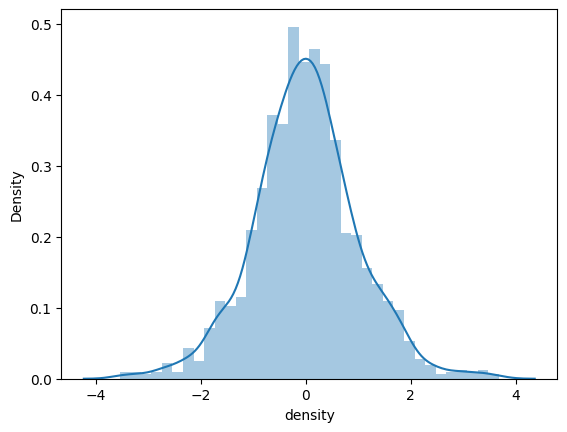

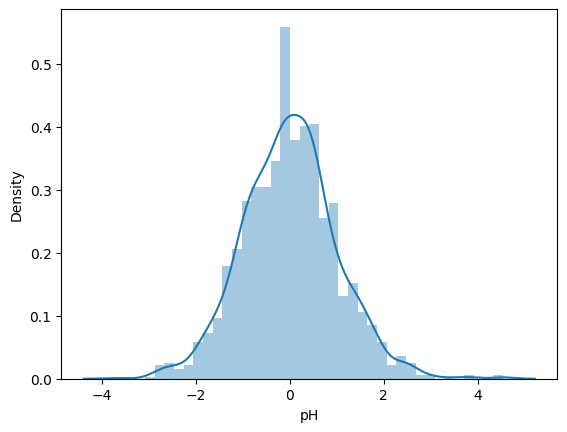

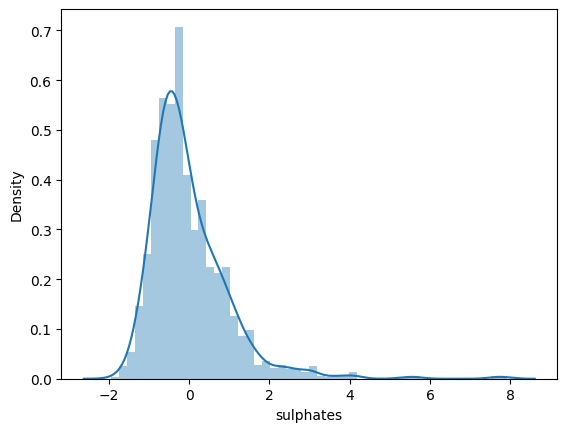

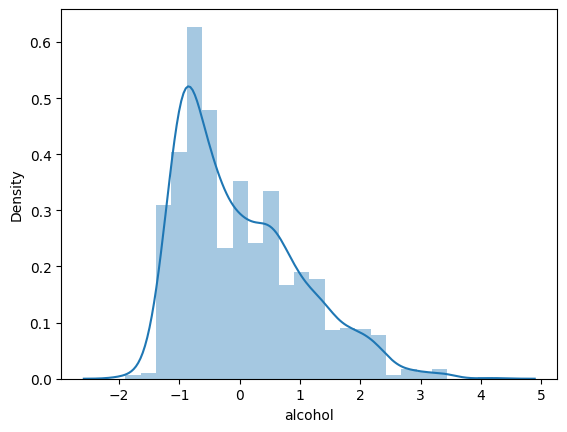

In [14]:
import seaborn as sns
# create distplots
for column in new_df.columns:
    plt.figure()             # <==================== here!
    sns.distplot(new_df[column])

In [15]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

As there are no missing values, we don't need to do data imputation.

In [16]:
x=new_df
y=df['quality']

In [17]:
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=42)

In [18]:
from sklearn.svm import SVC

In [19]:
model=SVC()
model.fit(train_x,train_y)

SVC()

In [23]:
y_pred = model.predict(train_x)
y_pred

array([6, 6, 5, ..., 5, 7, 6], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
accuracy_score(train_y,y_pred)

0.6788048552754435

In [25]:
confusion_matrix(y_pred,test_y)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  2,  13, 170,  76,   0,   0],
       [  0,   6,  46, 127,  51,   3],
       [  0,   0,   1,  10,  19,   4],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

As observed, the accuracy of the model is quite low. We need to implement the grid search approach to optimize the parameters to give the best accuracy.

#### Implementing Grid Search

Hyper parameter tuning technique:
1. Grid searchCV
2. randomized searchcv

In [28]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [32]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001, 0.0001]}

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. cs = [0.1, 1, 10, 100, 1000]for c in cs: svc = svm.SVC(kernel='rbf', C=c).fit(X, y)

gamma. gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set gammas = [0.1, 1, 10, 100]for gamma in gammas: svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)

In [33]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [34]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [35]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [46]:
model_new=SVC(C=10, gamma=1)
model_new.fit(train_x,train_y)

SVC(C=10, gamma=1)

In [47]:
accuracy_score(test_y,model_new.predict(test_x))

0.6268939393939394

In [39]:
r_grid= RandomizedSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [41]:
r_grid.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 50, 100, 500],
                                        'gamma': [1, 0.5, 0.1, 0.01, 0.001,
                                                  0.0001]},
                   verbose=3)

In [42]:
r_grid.best_params_

{'gamma': 1, 'C': 50}

## Support Vector Regression

Let’s talk about Linear Regression first. How to determine the best fit line? The idea is to create a line which minimises the total residual error. The SVR approach is a bit different. Instead of trying to minimise the error, SVR focuses on keeping the error in a fixed range. This approach can be explained using three lines. The first line is the best fit regressor line, and the other two lines are the bordering ones which denote the range of error.
<img src="SVR.PNG" width="500">

What does this mean? It means that we are going to consider the points inside this ± error boundary only for preparing our model. In other words, the best fit line(or the hyperplane) will be the line which goes through the maximum number of data points and the error boundaries are chosen to ensure maximum inclusion. This error term can be customized  using the '_epsilon_' parameter defined for the scikit-learn SVR implementation.  

## Python Implementation

In [48]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [49]:
df= pd.read_csv('Admission_Prediction.csv')

In [50]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [52]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

As we can see, there are some column with missing values. we need to impute those missing values.

In [53]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [54]:
# seeing that after imputation no column has missing values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [55]:
x=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']
columns=x.columns

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=33)

In [58]:
from sklearn.svm import SVR
svr= SVR()

In [59]:
svr.fit(train_x, train_y)

SVR()

In [61]:
from sklearn.metrics import r2_score
score= r2_score(test_y,svr.predict(test_x))
score

0.6646688364910851

In [63]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001] }
grid= GridSearchCV(SVR(),param_grid, verbose=2,cv=10)

In [64]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.5; total time=   0.0s
[CV] END ...................................C=

[CV] END ....................................C=10, gamma=0.5; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ....................................C=10, gamma=0.1; total time=   0.0s
[CV] END ...................................C=10, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=2)

In [65]:
grid.best_estimator_

SVR(C=50, gamma=0.001)

In [66]:
svr_new=SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
svr_new.fit(train_x, train_y)

SVR(C=50, gamma=0.001)

In [68]:
score_new= r2_score(test_y,svr_new.predict(test_x))
score_new

0.7457021772643715

In [69]:
import pickle
# saving the model to the local file system
"""from joblib import dump, load
filename = 'test1.joblib'
dump(svr_new, filename) """
filename = 'finalized_model.pickle'
pickle.dump(svr_new, open(filename, 'wb'))

In [116]:
!dir

 Volume in drive E has no label.
 Volume Serial Number is 5028-E134

 Directory of E:\suman\lasso_ridge\MLDeplVector

03/31/2022  08:39 AM    <DIR>          .
03/31/2022  08:39 AM    <DIR>          ..
05/25/2020  04:36 PM    <DIR>          .ebextensions
03/30/2022  09:54 PM    <DIR>          .ipynb_checkpoints
12/13/2019  01:44 PM            16,085 Admission_Prediction.csv
12/19/2019  08:54 PM             1,952 application.py
12/19/2019  09:13 PM             1,989 clientApp.py
12/19/2019  11:52 PM            44,326 createAPP.PNG
03/31/2022  08:47 AM             4,891 finalized_model.pickle
12/19/2019  11:54 PM            15,970 finalResult.PNG
12/19/2019  11:34 PM            34,124 FlaskApp.PNG
12/19/2019  04:18 PM           102,897 hyperplane.png
12/19/2019  06:41 PM            91,277 Kernels.png
12/19/2019  11:38 PM           118,046 ProjectStruct.PNG
12/18/2019  07:12 PM            26,176 red-wine-quality-cortez-et-al-2009.zip
12/19/2019  08:57 PM               257 requirements.txt


Now this saved model file will be used for prediction. We'll create a Flask app for the same and deploy it to AWS.

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9164032690651089


C:\Users\suman\.conda\envs\practice\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


# Flask App
As we’ll expose the created model as a web API to be consumed by the client/client APIs, we’d do it using the flask framework. 
The flow of our flask app will be:

<img src="FlaskApp.PNG" width="300">
•	Create the project structure, as shown below:
<img src="ProjectStruct.PNG" width="300">


In [73]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import pickle

app = Flask(__name__) # initializing a flask app

@app.route('/',methods=['GET'])  # route to display the home page
@cross_origin()
def homePage():
    return render_template("index.html")

@app.route('/predict',methods=['POST','GET']) # route to show the predictions in a web UI
@cross_origin()
def index():
    if request.method == 'POST':
        try:
            #  reading the inputs given by the user
            gre_score=float(request.form['gre_score'])
            toefl_score = float(request.form['toefl_score'])
            university_rating = float(request.form['university_rating'])
            sop = float(request.form['sop'])
            lor = float(request.form['lor'])
            cgpa = float(request.form['cgpa'])
            is_research = request.form['research']
            if(is_research=='yes'):
                research=1
            else:
                research=0
            filename = 'finalized_model.pickle'
            loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage
            # predictions using the loaded model file
            prediction=loaded_model.predict([[gre_score,toefl_score,university_rating,sop,lor,cgpa,research]])
            print('prediction is', prediction)
            # showing the prediction results in a UI
            return render_template('results.html',prediction=round(100*prediction[0]))
        except Exception as e:
            print('The Exception message is: ',e)
            return 'something is wrong.'
    # return render_template('results.html')
    else:
        return render_template('index.html')



if __name__ == "__main__":
    #app.run(host='127.0.0.1', port=8001, debug=True)
   app.run(debug=True) # running the app


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\suman\.conda\envs\practice\lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Deployment to AWS:
•	The python application file should be named application.py
•	Create a requirements.txt using pip freeze > requirements.txt from the project folder
•	Create a folder ‘.ebextensions’ and create a file ‘python.config’ inside it. Make sure to populate the content of python.config, as shown above.
•	Create the zip file from the project folder itself.
<img src="zipCreation.PNG">


#### Deployment Process
•	Go to https://aws.amazon.com/ and create an account if already don’t have one.
•	Go to the console and go to the ‘Build a web app’ section and click it.
<img src="webApp.PNG">

•	Give the name of the application, give platform as python, and select the option to upload your code from ZIP.
<img src='createAPP.PNG'>


### Final Result:

<img src="finalResult.PNG">